# Sequence 8 : Scipy

<img src="./img/sequence8_logo_scipy.png">

## Outils de calculs scientifiques pour Python

Collection d'algorithmes mathématiques et autres fonctions utiles basés sur Numpy.<br/>
Organisé en sous-catégories couvrant différents dommaines scientifiques (signal, stats, cluster, ...)

doc : http://www.scipy.org/

| Subpackage | Description   |
|------|------|
|cluster|Clustering algorithms|
|constants|Physical and mathematical constants|
|<b>fftpack</b>|Fast Fourier Transform routines|
|integrate|Integration and ordinary differential equation solvers|
|<b>interpolate</b>|Interpolation and smoothing splines|
|io|Input and Output|
|linalg|Linear algebra|
|ndimage|N-dimensional image processing|
|odr|Orthogonal distance regression|
|optimize|Optimization and root-finding routines|
|<b>signal</b>|Signal processing|
|sparse|Sparse matrices and associated routines|
|spatial|Spatial data structures and algorithms|
|special|Special functions|
|stats|Statistical distributions and functions|
|weave|C/C++ integration|

In [8]:
import numpy as np
import scipy
from scipy import interpolate
from scipy import fftpack
from scipy import signal

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.io.wavfile import read


## Exemple 1 : Interpolation

### Exercice 8.1 :

- Voici des données à interpoler.
En utilisant l'aide de scipy, trouver la fonction qui vous permetra de les interpoler de manière linéaire et cubique.
Tracez le résultat des interpolations sur une figure.

coup de pouce : utilisez [scipy.interpolate.interp1d](http://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.interp1d.html)

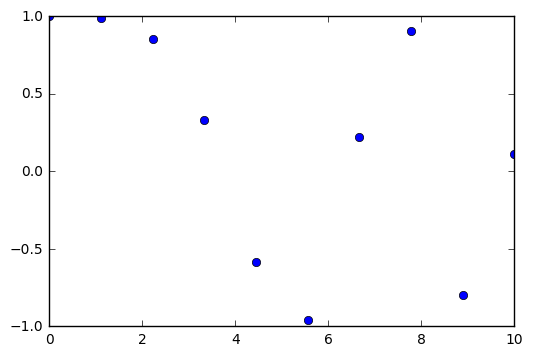

In [33]:
#Données :
x = np.linspace(0, 10, num=10)
y = np.cos(-x**2/9.0)

plt.plot(x,y, 'o')




### Solution 8.1 :

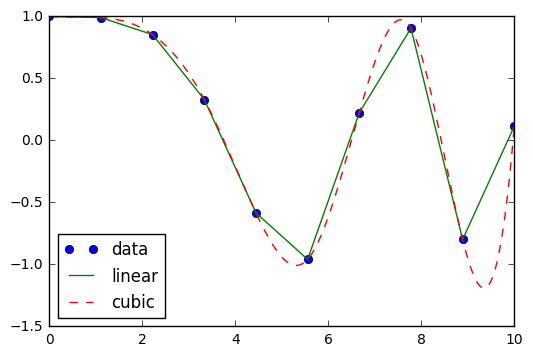

In [37]:
# Interpolations :
f1 = scipy.interpolate.interp1d(x, y)
f2 = scipy.interpolate.interp1d(x, y, 'cubic')

# Tracés :
xnew = np.linspace(0, 10,num=1000)
f1_inter = f1(xnew)
f2_inter = f2(xnew)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', xnew, f1_inter, '-', xnew, f2_inter, '--')
ax.legend(['data', 'linear', 'cubic'], loc='best')

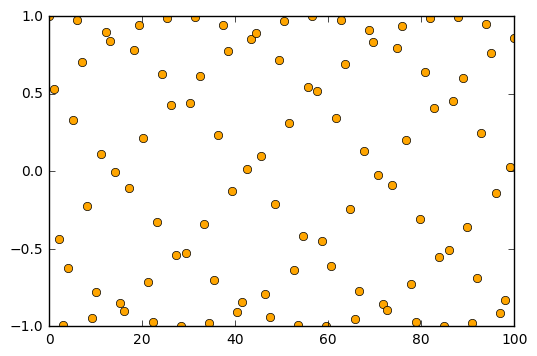

In [55]:
#Données :
x = np.linspace(0, 100,num=100)
y = np.cos(x)

plt.plot(x,y, 'o',color='orange')

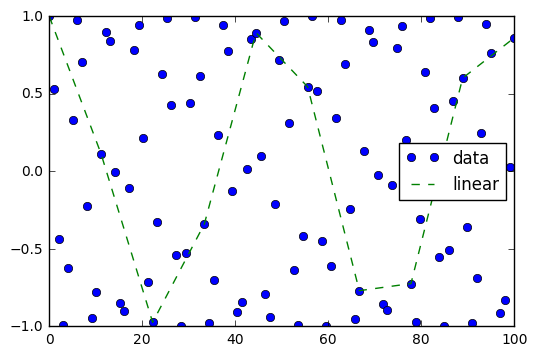

In [62]:
f1 = scipy.interpolate.interp1d(x, y,'quadratic')
xnew = np.linspace(0, 100, num=10)
f1_inter = f1(xnew)
fig, ax = plt.subplots()
ax.plot(x, y, 'o',xnew, f1_inter, '--')
ax.legend(['data', 'linear'], loc='best')

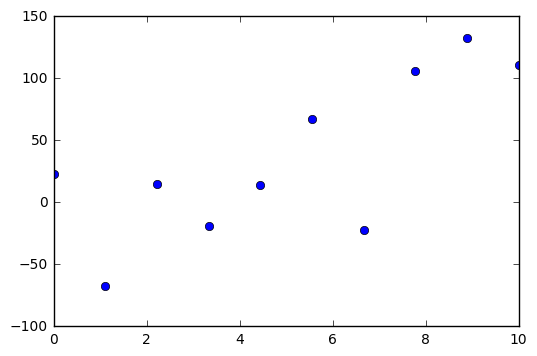

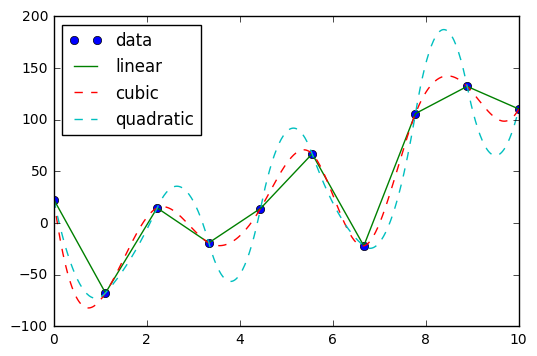

In [65]:
#Données :
x = np.linspace(0, 10, num=10)
y = x**3 /10+ np.random.randn(10)*60
plt.plot(x,y, 'o')


# Interpolations :
f1 = scipy.interpolate.interp1d(x, y)
f2 = scipy.interpolate.interp1d(x, y, 'cubic')
f3 = scipy.interpolate.interp1d(x, y, 'quadratic')

# Tracés :
xnew = np.linspace(0, 10, num=410, endpoint=True)
f1_inter = f1(xnew)
f2_inter = f2(xnew)
f3_inter = f3(xnew)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', xnew, f1_inter, '-', xnew, f2_inter, '--', xnew,f3_inter, '--')
ax.legend(['data', 'linear', 'cubic','quadratic'], loc='best')


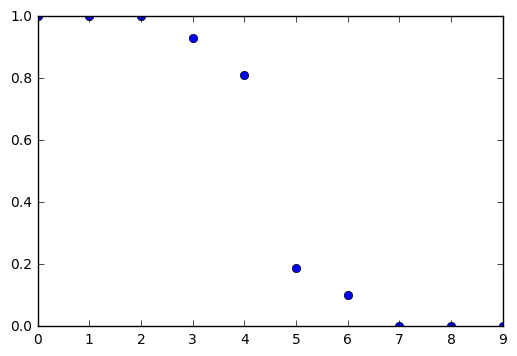

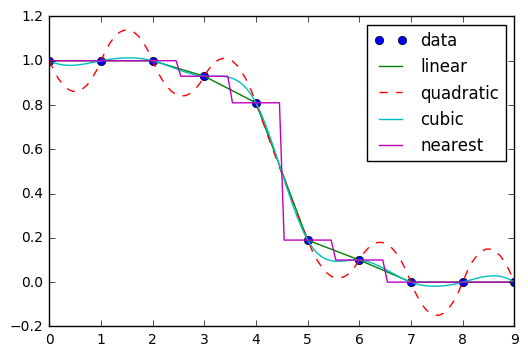

In [71]:
#Données :
x = np.linspace(0, 9, num=10)
y = [1,1,1,0.93,0.81,0.19,0.1,0,0,0]
plt.plot(x,y, 'o')


# Interpolations :
f1 = scipy.interpolate.interp1d(x, y)
f2 = scipy.interpolate.interp1d(x, y,'quadratic')
f3 = scipy.interpolate.interp1d(x, y, 'cubic')
f4 = scipy.interpolate.interp1d(x, y,'nearest')
# Tracés :
xnew = np.linspace(0, 9, num=100, endpoint=True)
f1_inter = f1(xnew)
f2_inter = f2(xnew)
f3_inter = f3(xnew)
f4_inter = f4(xnew)

fig, ax = plt.subplots()
ax.plot(x, y, 'o', xnew, f1_inter, '-', xnew, f2_inter, '--',xnew,f3_inter,xnew,f4_inter)
ax.legend(['data', 'linear','quadratic', 'cubic','nearest'], loc='best')

## Exemple 2 : FFT + Filtrage

### Etape 1 : Ouvrir et afficher un son

- On souhaite ouvrir un fichier son ("speech.wav" dans Data), et afficher ce son + le lire.
- Fréquence d'echantillonage du son : 11025 Hz

duree du son : 1.509297052154195secondes
16640


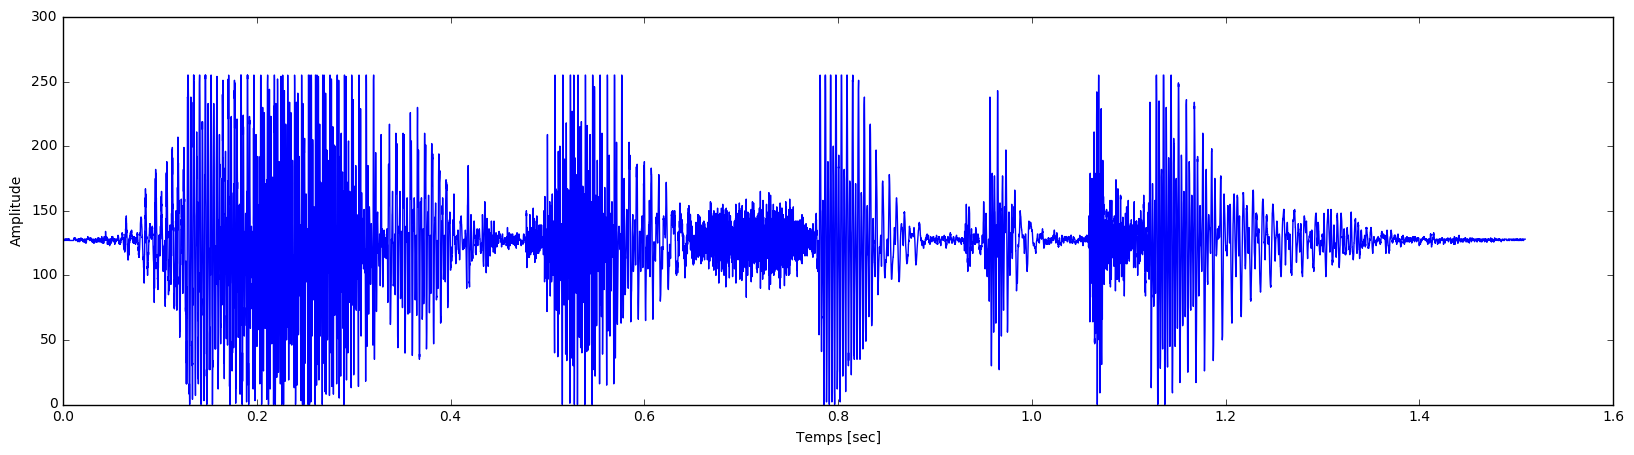

In [94]:
fe = 11025.

# read audio samples
input_data = read("speech.wav")
audio = input_data[1]

print("duree du son : "+ str(audio.size/fe) + "secondes")

# Création du signal

times = np.arange(0,audio.size/fe , 1./fe, dtype = 'float64')  # Vecteur temps
l = times.size
print(l)
# Figure
fig, ax = plt.subplots(figsize=(20,5)) 
ax.plot(times, audio)
ax.set_xlabel('Temps [sec]')
ax.set_ylabel('Amplitude')

In [89]:
import IPython.display
from ipywidgets import interact, interactive, fixed

IPython.display.Audio(data=audio, rate=fe/1)
#IPython.display.Audio(data=audio, rate=fe/2)
#IPython.display.Audio(data=audio, rate=fe/0.5)

### Etape 2 : Calcul et tracé du spectre

<img src="./img/sequence08_spectre.jpg" width=100, height=20>

- Pour voir le contenu fréquentiel de notre signal, nous allons calculer le "spectre" du signal et le tracer. <br/> 
La FFT (Fast Fourier Transform) est une trasformation mathématique qui donne une vision de ce spectre de manière "assez simple"

[ 5505.87439904  5506.53695913  5507.19951923  5507.86207933  5508.52463942
  5509.18719952  5509.84975962  5510.51231971  5511.17487981  5511.8374399
 -5512.5        -5511.8374399  -5511.17487981 -5510.51231971 -5509.84975962
 -5509.18719952 -5508.52463942 -5507.86207933 -5507.19951923 -5506.53695913]
(-137.605031811+2103.56073817j)


(0, 60000)

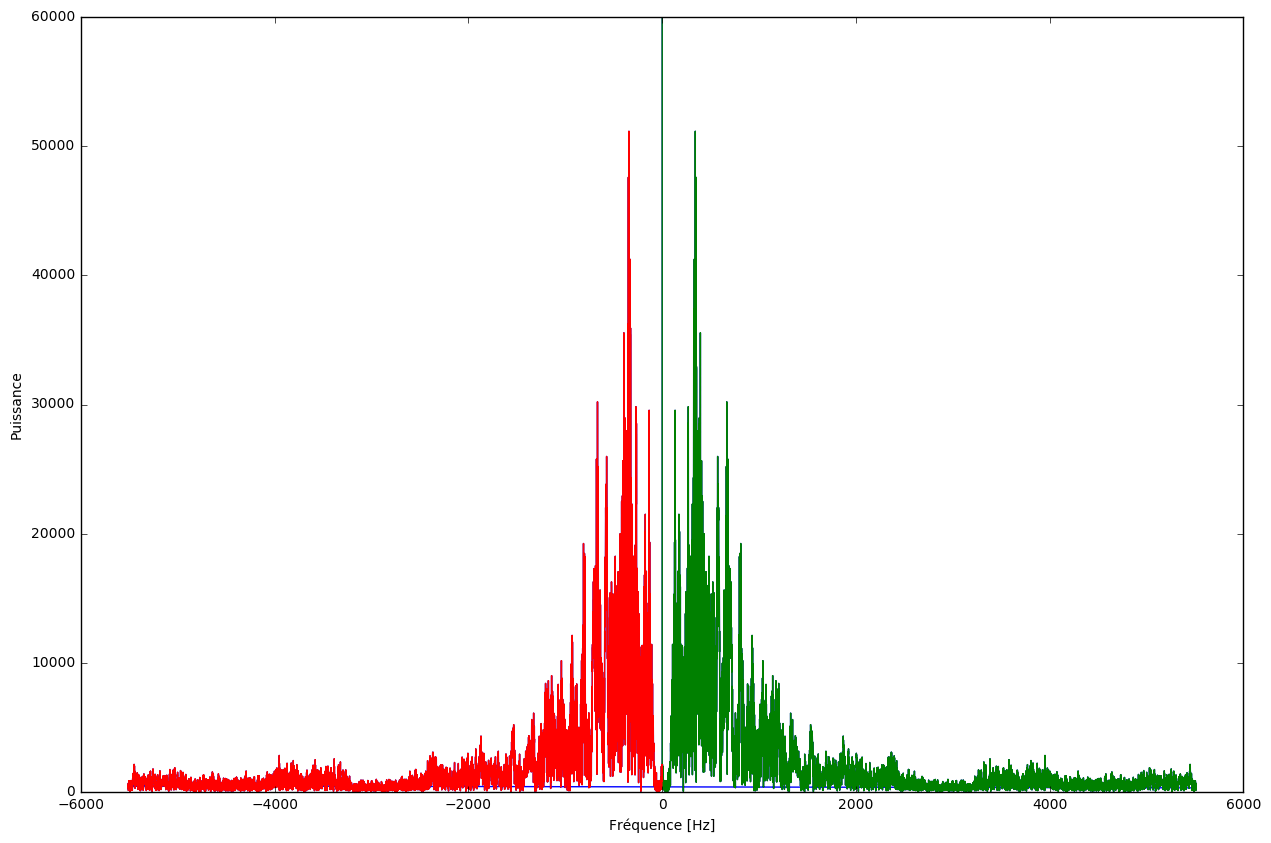

In [113]:

# Calcul de la transformée de Fourier du signal
sig_fft = scipy.fftpack.fft(audio)

# Création du vecteur de fréquences associé aux valeurs spectrales
sample_freq = scipy.fftpack.fftfreq(audio.size, d=1./fe)

print(sample_freq[int(l/2)-10:int(l/2)+10])


print(sig_fft[1])

# Tracé du spectre
fig2, ax2 = plt.subplots(figsize=(15,10)) 
ax2.plot(sample_freq, np.abs(sig_fft))
ax2.plot(sample_freq[0:int(l/2)], np.abs(sig_fft)[0:int(l/2)], 'g')
ax2.plot(sample_freq[int(l/2):], np.abs(sig_fft[int(l/2):]), 'r')
ax2.set_xlabel('Fréquence [Hz]')
ax2.set_ylabel('Puissance')
ax2.set_ylim([0, 60000])

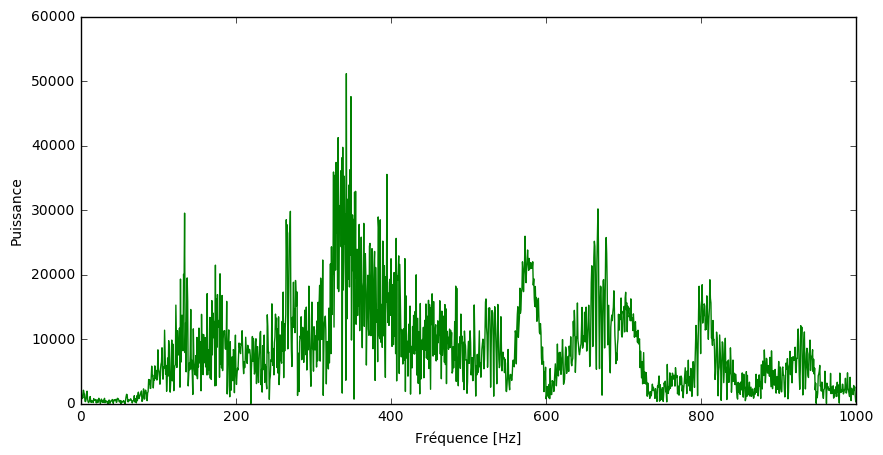

In [114]:
# On voit que le spectre obtenu est symétrique, 
# seule la partie positive suffira pour tracer le spectre
# et range des F0 des voix humaines < 1000
pidxs = np.logical_and(sample_freq > 0 ,sample_freq< 1000) 

freqs = sample_freq[pidxs]
power = np.abs(sig_fft)[pidxs]

# Tracé du spectre
fig3, ax3 = plt.subplots(figsize=(10,5)) 
ax3.plot(freqs, power, 'g')
ax3.set_xlabel('Fréquence [Hz]')
ax3.set_ylabel('Puissance')

**Conclusion : F0 = 120 Hz environ 

F0 est de 133.837139423 Hz


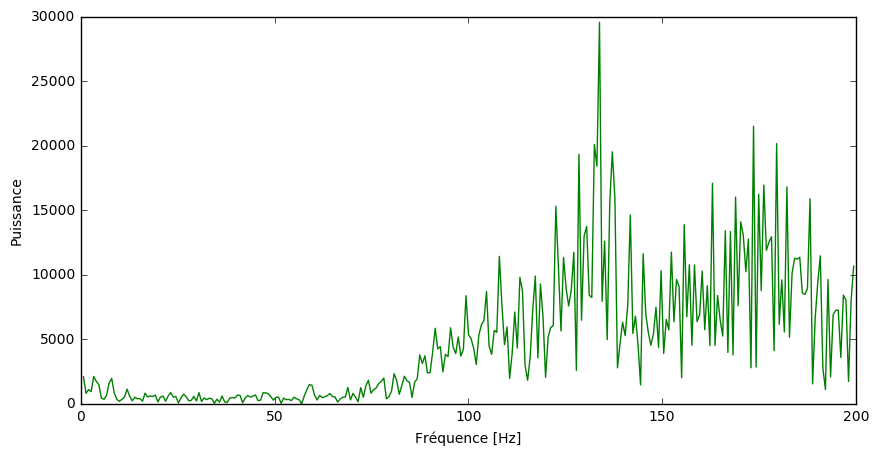

In [137]:
pidxxs = freqs< 200

freqs_for_F0 = freqs[pidxxs]
power_for_F0 = power[pidxxs]


# Tracé du spectre
fig3, ax3 = plt.subplots(figsize=(10,5)) 
ax3.plot(freqs_for_F0, power_for_F0, 'g')
ax3.set_xlabel('Fréquence [Hz]')
ax3.set_ylabel('Puissance')

#determination de F0
F0=freqs_for_F0[np.argmax(power_for_F0)]

print("F0 est de " + str(F0) + " Hz")

### Etape 3 : Filtrage du signal

- Notre signal est bruité.. On va nettoyer le signal à l'aide 'un filtre qui enlève toutes les fréquences > 4000 et < 100 Hz (passe-bande)

1. Création du filtre : 

11025.0
[0.018140589569160998, 0.7256235827664399]


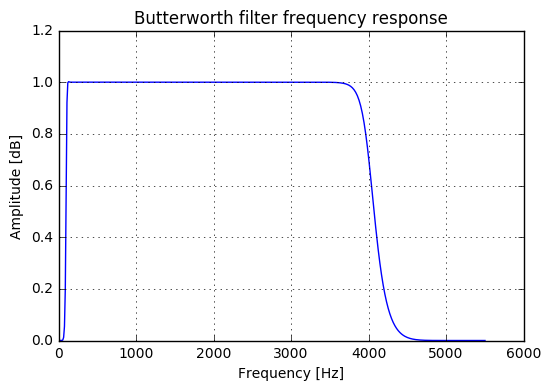

In [181]:
# Paramètres de notre filtre :
f_lowcut = 100.
f_hicut = 4000.

#f_lowcut = 1000.
#f_hicut = 2000.
print(fe)
nyq = 0.5 * fe
N = 10                   # Ordre du filtre
Wn = [f_lowcut/nyq,f_hicut/nyq]  # Nyquist frequency fraction
print(Wn)

# Création du filtre :
b, a = scipy.signal.butter(N, Wn, 'band')

# Calcul de la reponse en fréquence du filtre
w, h = signal.freqz(b, a)

# Tracé de la réponse en fréquence du filtre
plt.plot(0.5*fe*w/np.pi, np.abs(h), 'b')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.show()

2 : On applique ce filtre à notre signal

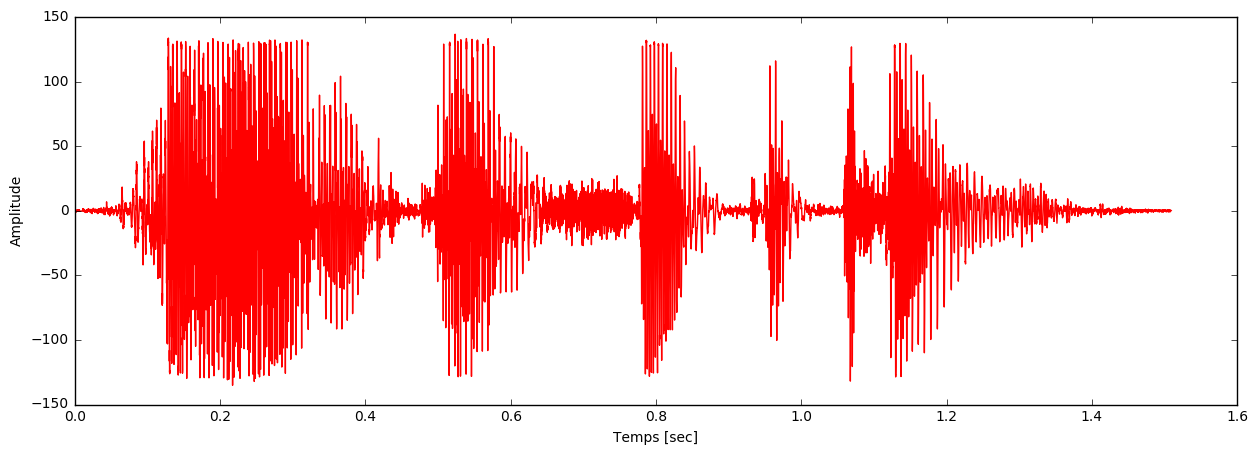

In [182]:
# Applique le filtre au signal :
filtered_sig = scipy.signal.filtfilt(b, a, audio)

# Tracé du signal filtré
plt.figure(figsize=(15,5))
#fig = plt.plot(times, sig)
fig = plt.plot(times, filtered_sig, 'r')
plt.xlabel('Temps [sec]')
plt.ylabel('Amplitude')

In [183]:
#jouons ce son filtré : 
IPython.display.Audio(data=filtered_sig, rate=fe)

### Etape 4 : Tracé du spectre du signal filtré

### Exercice 8.2 : A vous de jouer ! 

### Solution 8.2 :

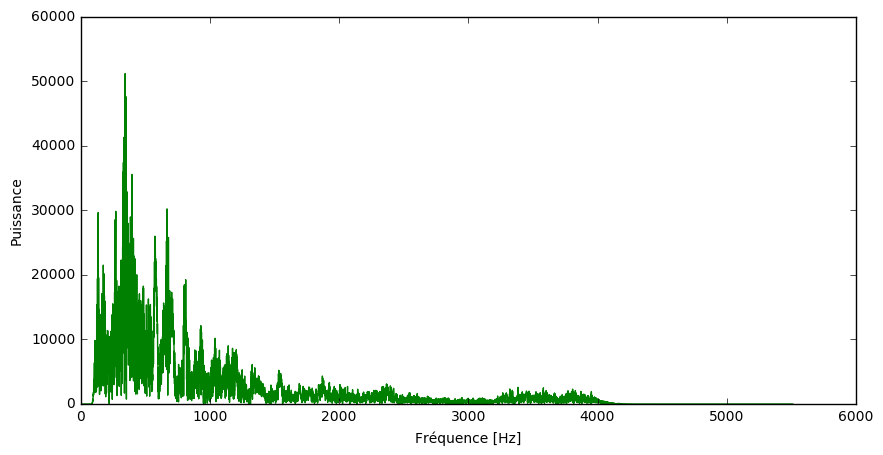

In [184]:
 # Calcul de la transformée de Fourier du signal filtré
out_sig_fft = scipy.fftpack.fft(filtered_sig)

# Création du vecteur de fréquences associé aux valeurs spectrales
out_sample_freq = scipy.fftpack.fftfreq(filtered_sig.size, d=1./fe)

# Sélection de la moitié du spectre, correspondant aux fréquences positives
out_pidxs = np.where(out_sample_freq > 0)
out_freqs = sample_freq[out_pidxs]
out_power = np.abs(out_sig_fft)[out_pidxs]

# Tracé du nouveau spectre
plt.figure(figsize=(10,5))
plt.plot(out_freqs, out_power, 'g')
plt.xlabel('Fréquence [Hz]')
plt.ylabel('Puissance')